In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('housetrain.csv')

In [ ]:
df.shape

(1460, 244)

In [8]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


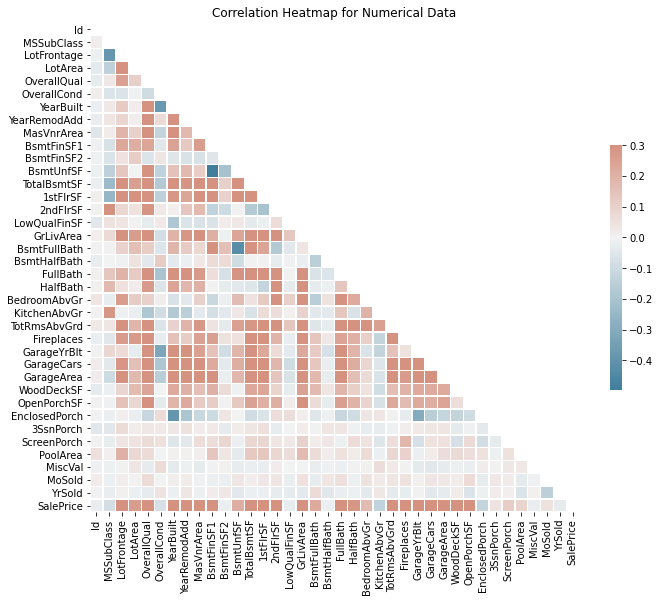

In [ ]:
#generate corr heatmap
import seaborn as sns
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Heatmap for Numerical Data')
plt.show()

In [ ]:
#corr of features with y
corr[-1:]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SalePrice,-0.021917,-0.084284,0.351799,0.263843,0.790982,-0.077856,0.522897,0.507101,0.477493,0.38642,-0.011378,0.214479,0.613581,0.605852,0.319334,-0.025606,0.708624,0.227122,-0.016844,0.560664,0.284108,0.168213,-0.135907,0.533723,0.466929,0.486362,0.640409,0.623431,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.02119,0.046432,-0.028923,1.0


In [ ]:
#view of data
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [ ]:
df = pd.read_csv('housetrain.csv')
df.iloc[:,1].dtype

dtype('int64')

In [10]:
#PREPROCESSING
df = pd.read_csv('housetrain.csv')
y = df['SalePrice']
#convert data type to categorical data 
nrow, ncol = df.shape
for i in range(0, ncol - 1): 
    if df.iloc[:,i].dtype == 'O':
        df.iloc[:,i] = df.iloc[:,i].astype('category')
#manually set some categorical data to ordered, specify order types [According to Data Dictionary]
#use numeric encoding for ORDERED categorical columns
#use ONE HOT encoding for NOMINAL categorical columns
pd.Categorical(df['OverallQual'], ordered=True) #of int type (do not need to convert)

df['ExterQual'] = df['ExterQual'].cat.reorder_categories(['Fa','TA','Gd','Ex'], ordered = True)
df['ExterQual'] = df['ExterQual'].cat.codes

df['ExterCond'] = df['ExterCond'].cat.reorder_categories(['Po','Fa','TA','Gd','Ex'], ordered = True)
df['ExterCond'] = df['ExterCond'].cat.codes

df['BsmtQual'] = df['BsmtQual'].cat.reorder_categories(['Fa','TA','Gd','Ex'], ordered = True)
df['BsmtQual'] = df['BsmtQual'].cat.codes

df['BsmtCond'] = df['BsmtCond'].cat.reorder_categories(['Po','Fa','TA','Gd'], ordered = True)
df['BsmtCond'] = df['BsmtCond'].cat.codes

df['BsmtFinType1'] = df['BsmtFinType1'].cat.reorder_categories(['Unf','LwQ','Rec','BLQ','ALQ','GLQ'], ordered = True)
df['BsmtFinType1'] = df['BsmtFinType1'].cat.codes

df['BsmtFinType2']= df['BsmtFinType2'].cat.reorder_categories(['Unf','LwQ','Rec','BLQ','ALQ','GLQ'], ordered = True)
df['BsmtFinType2']= df['BsmtFinType2'].cat.codes

df['HeatingQC'] = df['HeatingQC'].cat.reorder_categories(['Po','Fa','TA','Gd','Ex'], ordered = True)
df['HeatingQC'] = df['HeatingQC'].cat.codes

df['KitchenQual'] = df['KitchenQual'].cat.reorder_categories(['Fa','TA','Gd','Ex'], ordered = True)
df['KitchenQual'] = df['KitchenQual'].cat.codes

df['FireplaceQu']= df['FireplaceQu'].cat.reorder_categories(['Po','Fa','TA','Gd','Ex'], ordered = True)
df['FireplaceQu']= df['FireplaceQu'].cat.codes

df['GarageQual'] = df['GarageQual'].cat.reorder_categories(['Po','Fa','TA','Gd','Ex'], ordered = True)
df['GarageQual'] = df['GarageQual'].cat.codes

df['GarageCond'] = df['GarageCond'].cat.reorder_categories(['Po','Fa','TA','Gd','Ex'], ordered = True)
df['GarageCond'] = df['GarageCond'].cat.codes

print(df.shape)
#DROP columns that contain too many NaN
df = df.drop(columns=['PoolQC','Id'])
print(df.shape)
#use ONE HOT encoding for NOMINAL categorical columns 
df = pd.get_dummies(df)
print(df.shape)
        

(1460, 81)
(1460, 79)
(1460, 244)


In [ ]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,...,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,2,2,2,2,5,706,0,0,150,856,4,856,854,0,1710,1,0,2,1,3,1,2,8,0,-1,2003.0,2,548,2,2,0,61,...,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,1,2,2,2,4,978,0,0,284,1262,4,1262,0,0,1262,0,1,2,0,3,1,1,6,1,2,1976.0,2,460,2,2,298,0,...,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,2,2,2,2,5,486,0,0,434,920,4,920,866,0,1786,1,0,2,1,3,1,2,6,1,2,2001.0,2,608,2,2,0,42,...,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,1,2,1,3,4,216,0,0,540,756,3,961,756,0,1717,1,0,1,0,3,1,2,7,1,3,1998.0,3,642,2,2,0,35,...,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,2,2,2,2,5,655,0,0,490,1145,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,1,2,2000.0,3,836,2,2,192,84,...,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [11]:
#Split test and training sample
#fill NaN
df = df.fillna(df.mean())
from sklearn.model_selection import train_test_split
X = df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
#linear regression as basis
#standaridization (fit scaler on TRAINING data only)
from sklearn.preprocessing import StandardScaler 
standardizer = StandardScaler()
Xstandardized = pd.DataFrame(standardizer.fit_transform(X_train))

#vanilla linear regression
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(Xstandardized, y_train)
y_train_predict = linear.predict(Xstandardized)

#MSE train
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, y_train_predict)

#MSE Test
test_Xstandardized = standardizer.transform(X_test)
y_test_predict = linear.predict(test_Xstandardized)
mean_squared_error(y_test, y_test_predict)

719.6233993771561

In [14]:
#Linear Regression with Regularization Terms 
#L2
from sklearn.linear_model import Ridge
clf = Ridge(alpha = 0.1)
clf.fit(Xstandardized, y_train)
l2_train_predict = clf.predict(Xstandardized)
#MSE train
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
mean_squared_error(y_train, l2_train_predict)
#Accuracy train
accuracy_score(y_train, l2_train_predict)

#MSE & Accuracy Test
l2_y_test_predict = clf.predict(test_Xstandardized)
mean_squared_error(y_test, l2_y_test_predict)
accuracy(y_test, l2_y_test_predict)

##Plot Test and Train Loss as a function of alpha
#TODO:

ValueError: ignored

In [ ]:
#L1 Regression
#Todo: 
from sklearn.linear_model import Lasso
clf = Lasso(alpha = 0.1)
clf.fit(Xstandardized, y_train)
l1_train_predict = clf.predict(Xstandardized)
#Train MSE:
mean_squared_error(y_train, l1_train_predict)
accuracy(y_train, l1_train_predict)

#Test MSE:
l1_y_test_predict = clf.predict(test_Xstandardized)
mean_squared_error(y_test, l1_y_test_predict)
accuracy(y_test, l1_y_test_predict)

##Plot Test and Train Loss as a function of alpha
#Todo: